In [11]:
import scipy.io
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import pickle

In [12]:
data = scipy.io.loadmat("ex8data1.mat")
trash, y1, X1 = data["X"], data["yval"], data["Xval"]
y1 = y1.reshape(len(y1))

In [13]:
data = scipy.io.loadmat("ex8data2.mat")
X2_normal, y2, X2 = data["X"], data["yval"], data["Xval"]
y2 = y2.reshape(len(y2))
y2_normal = np.array([0]*len(X2_normal))

In [14]:
y2 = np.concatenate([y2, y2_normal])
X2 = np.concatenate([X2, X2_normal])

In [15]:
X1.shape, X2.shape

((307, 2), (1100, 11))

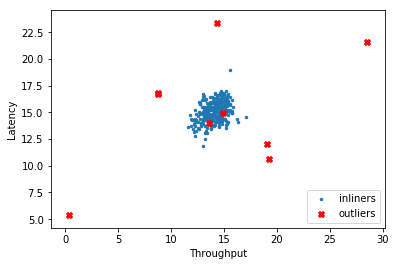

In [16]:
fig, ax = plt.subplots()
ax.scatter(X1[:, 0], X1[:, 1], s=6, label="inliners")
ax.scatter(X1[y1==1, 0], X1[y1==1, 1], marker="X", color='r', label="outliers")
ax.legend(loc="lower right")
ax.set_xlabel("Throughput")
ax.set_ylabel("Latency")
plt.show()

In [17]:
fig, ax = plt.subplots()
ax.scatter(X1[:, 0], X1[:, 1], s=6, label="inliners")
ax.scatter(X1[y1==1, 0], X1[y1==1, 1], marker="X", color='r', label="outliers")
ax.legend(loc="lower right")
ax.set_xlabel("Throughput")
ax.set_ylabel("Latency")

Text(0,0.5,'Latency')

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
scaler = StandardScaler()

In [20]:
X = scaler.fit_transform(X2)
X_reduce = pca.fit_transform(X)

In [21]:
#Plot all the ground truth points together with the predictions
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x_composite_1")
ax.set_ylabel("x_composite_2")
ax.set_zlabel("x_composite_3")
ax.set_title("Outlier in reduced dimension")

#Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=0, label="inliers")

#Plot x's for the ground truth outliers
ax.scatter(X_reduce[y2==1, 0], X_reduce[y2==1, 1], zs=X_reduce[y2==1, 2], lw=2, s=60, marker="x", color="r", label="outliers")
ax.legend()

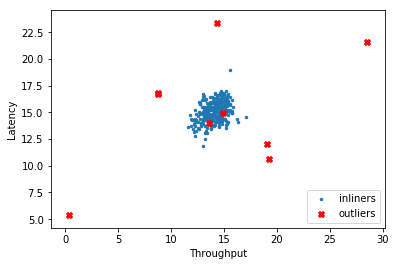

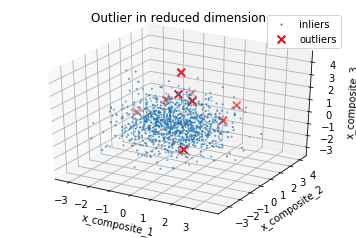

In [22]:
plt.show()

In [23]:
from sklearn.covariance import EllipticEnvelope
outlier_frac = 0.035
ell = EllipticEnvelope(contamination=outlier_frac)
ell.fit(X1)

EllipticEnvelope(assume_centered=False, contamination=0.035,
         random_state=None, store_precision=True, support_fraction=None)

In [24]:
#Binary prediction of normal vs. outlier
pred = ell.predict(X1)
sum(pred == -1) #Outlier points are predicted as -1

11

In [25]:
#Continuous output of the decision function
decision = ell.decision_function(X1)
decision.min(), decision.max()

(-4.2695076301281745, 2.0753284731102735)

In [26]:
#Get the thresholding value from the decision function
threshold = stats.scoreatpercentile(ell.decision_function(X1), 100*outlier_frac)
threshold

0.001791478236712489

In [27]:
#First make a meshgrid for the (x1, x2) feature space
x1s = np.linspace(np.min(X1[:, 0])-5, np.max(X1[:, 0])+5, 15)
x2s = np.linspace(np.min(X1[:, 1])-5, np.max(X1[:, 1])+5, 15)
x1grid, x2grid = np.meshgrid(x1s, x2s)

In [28]:
#Now make predictions for each point on the grid
Xgrid = np.column_stack((x1grid.ravel(), x2grid.ravel())) #Feature matrix containing all grid points
dens = ell.decision_function(Xgrid)
densgrid = dens.reshape(x1grid.shape) #Reshape the vector of densities back onto the "grid"

In [29]:
#Use the densities as the "z" values in a contour plot on the grid
fig, ax = plt.subplots()
ax.set_xlabel("throughput")
ax.set_ylabel("latency")
ax.set_title("Outlier decision function contours")
ax.contourf(x1grid, x2grid, densgrid, cmap=plt.cm.Blues_r, levels=np.linspace(dens.min(), threshold, 7))
ax.scatter(X1[:, 0], X1[:, 1], s=4, color="g")

#Plot circles arround the predicted outliers
ax.scatter(X1[pred == -1, 0], X1[pred == -1, 1], facecolors="none", edgecolors="red", label="predicted outliers")
ax.legend(loc="lower right")

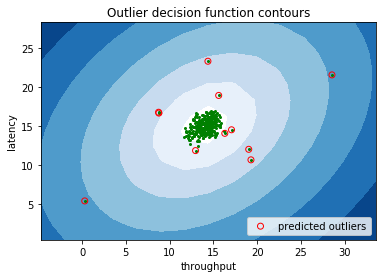

In [30]:
plt.show()